In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np 
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

train = pd.read_csv("../input/its-a-fraud/train.csv")
test = pd.read_csv("../input/its-a-fraud/test.csv")

In [4]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3424175,0,11053717,49.00,W,5033,269.0,150.0,mastercard,224.0,debit,330.0,87.0,6.0,NaN,gmail.com,NaN,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0,2.0,14.0,14.0,9.0,370.0,9.0,NaN,NaN,NaN,NaN,14.0,351.0,NaN,NaN,NaN,375.0,T,T,T,M0,T,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,98.000000,0.000000,0.0,98.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,98.000000,0.000000,0.0,98.000000,0.0,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3206179,0,51508

In [5]:
print("Train Data : ",train.shape)
print("Test Data : ",test.shape)

Train Data :  (442905, 434)
Test Data :  (147635, 433)


In [6]:
f = train[train['isFraud'] == 1].shape[0]
nf = train[train['isFraud'] == 0].shape[0]
print("Frauds:", f)
print("Not Fraud:",nf)
print("Fraud Percentage:",round(f/(f + nf) * 100, 2))

Frauds: 15497
Not Fraud: 427408
Fraud Percentage: 3.5


<AxesSubplot:xlabel='isFraud', ylabel='count'>

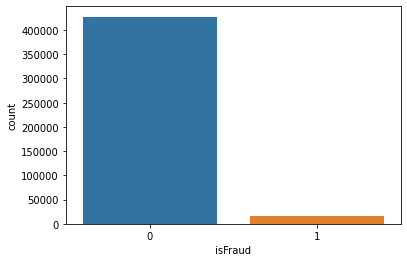

In [9]:
sns.countplot(x ='isFraud', data = train)

As we can see from the above histogram, the data is imbalanced as only 3.5% of the total transactions are fraud.

### TransactionDT
TransactionDT : timedelta from a given reference datetime (not an actual timestamp).

“TransactionDT" corresponds to the number of seconds in a day

Let's check the difference in datetime between training and testing data.

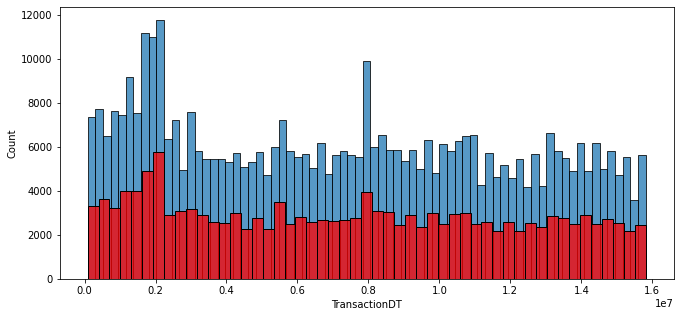

In [10]:
plt.figure(figsize=(11,5))
sns.histplot(train['TransactionDT'])
sns.histplot(test['TransactionDT'],color='r')
plt.show()

We observe that the train and test dataset transactions are overlapping

### TransactionAmt
TransactionAMT: transaction payment amount in USD.

#### Checking for outliers

<AxesSubplot:xlabel='TransactionDT', ylabel='TransactionAmt'>

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


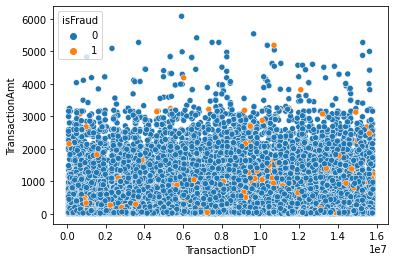

In [11]:
sns.scatterplot(x=train["TransactionDT"],y=train["TransactionAmt"],hue=train["isFraud"])

<AxesSubplot:xlabel='TransactionDT', ylabel='TransactionAmt'>

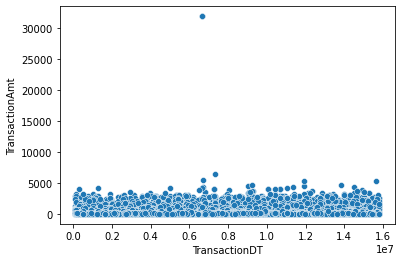

In [12]:
sns.scatterplot(x=test["TransactionDT"],y=test["TransactionAmt"])

### ProductCD

In [13]:
train['ProductCD'].unique()

array(['W', 'H', 'C', 'R', 'S'], dtype=object)

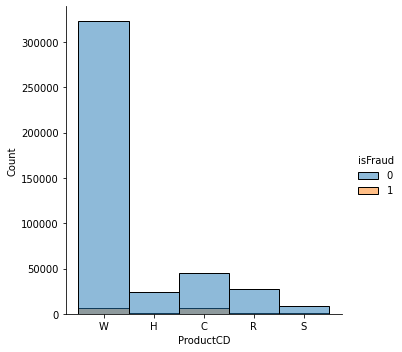

In [14]:
sns.displot(data=train,x=train['ProductCD'],kind="hist",hue=train['isFraud'])

In [15]:
W_cat = train.loc[train["ProductCD"]=='W', "isFraud"].value_counts()
H_cat = train.loc[train["ProductCD"]=='H', "isFraud"].value_counts()
C_cat = train.loc[train["ProductCD"]=='C', "isFraud"].value_counts()
R_cat = train.loc[train["ProductCD"]=='R', "isFraud"].value_counts()
S_cat = train.loc[train["ProductCD"]=='S', "isFraud"].value_counts()
print("Percentage of Fraud Transactions for product W:",round(W_cat[1] * 100/(W_cat[0]+W_cat[1]), 2))
print("Percentage of Fraud Transactions for product H:",round(H_cat[1] * 100/(H_cat[0]+H_cat[1]), 2))
print("Percentage of Fraud Transactions for product C:",round(C_cat[1] * 100/(C_cat[0]+C_cat[1]), 2))
print("Percentage of Fraud Transactions for product R:",round(R_cat[1] * 100/(R_cat[0]+R_cat[1]), 2))
print("Percentage of Fraud Transactions for product S:",round(S_cat[1] * 100/(S_cat[0]+S_cat[1]), 2))

Percentage of Fraud Transactions for product W: 2.04
Percentage of Fraud Transactions for product H: 4.81
Percentage of Fraud Transactions for product C: 11.7
Percentage of Fraud Transactions for product R: 3.81
Percentage of Fraud Transactions for product S: 5.89


From above observation we see that product W has lowest percantage i.e 2% of Fraud and product C has highest percantage of fraud i.e 11.7%

### Card1 - Card6
payment card information, such as card type, card category, issue bank, country, etc.

In [16]:
cards = ['card1','card2','card3','card4','card5','card6','isFraud']
train[cards].head()

,card1,card2,card3,card4,card5,card6,isFraud
0,5033,269.0,150.0,mastercard,224.0,debit,0
1,4527,376.0,150.0,visa,226.0,debit,0
2,2772,512.0,150.0,visa,226.0,debit,0
3,14290,512.0,150.0,visa,226.0,debit,0
4,12839,321.0,150.0,visa,226.0,debit,0


As we can see from above dataframe, cards 1, 2, 3, 5 are numerical and card 4 and 6 are categorical.

visa                288368
mastercard          142101
american express      6274
discover              4971
Name: card4, dtype: int64


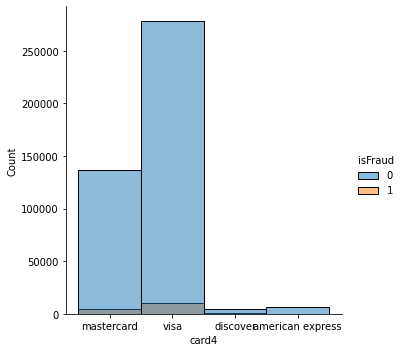

In [17]:
print(train['card4'].value_counts())
sns.displot(data=train,x=train['card4'],kind="hist",hue=train['isFraud'])
plt.show()

In [18]:
visa = train.loc[train["card4"]=='visa', "isFraud"].value_counts()
mastercard = train.loc[train["card4"]=='mastercard', "isFraud"].value_counts()
american_express = train.loc[train["card4"]=='american express', "isFraud"].value_counts()
discover = train.loc[train["card4"]=='discover', "isFraud"].value_counts()
print("Percentage of Fraud Transactions for visa card:",round(visa[1] * 100/(visa[0]+visa[1]), 2))
print("Percentage of Fraud Transactions for mastercard card:",round(mastercard[1] * 100/(mastercard[0]+mastercard[1]), 2))
print("Percentage of Fraud Transactions for american express card:",round(american_express[1] * 100/(american_express[0]+american_express[1]), 2))
print("Percentage of Fraud Transactions for discover card:",round(discover[1] * 100/(discover[0]+discover[1]), 2))

Percentage of Fraud Transactions for visa card: 3.45
Percentage of Fraud Transactions for mastercard card: 3.47
Percentage of Fraud Transactions for american express card: 2.95
Percentage of Fraud Transactions for discover card: 7.99


From above observation we see that discover card has highest percantage of fraud i.e 7.9%.

debit              329967
credit             111718
debit or credit        24
charge card            11
Name: card6, dtype: int64


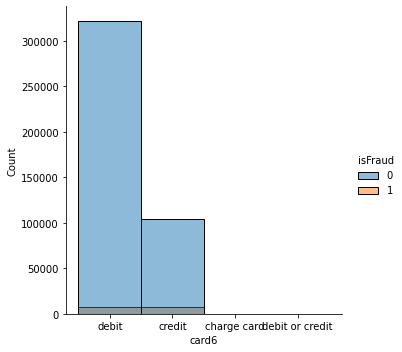

In [19]:
print(train['card6'].value_counts())
sns.displot(data=train,x=train['card6'],kind="hist",hue=train['isFraud'])
plt.show()

In [20]:
debit = train.loc[train["card6"]=='debit', "isFraud"].value_counts()
credit = train.loc[train["card6"]=='credit', "isFraud"].value_counts()

print("Percentage of Fraud Transactions for debit card:", round(debit[1] * 100 /(debit[0]+debit[1]), 2))
print("Percentage of Fraud Transactions for credit card:",round(credit[1] * 100/(credit[0]+credit[1]), 2))
print("Percentage of Fraud Transactions for debit or credit card: 0")
print("Percentage of Fraud Transactions for charge card: 0")

Percentage of Fraud Transactions for debit card: 2.43
Percentage of Fraud Transactions for credit card: 6.66
Percentage of Fraud Transactions for debit or credit card: 0
Percentage of Fraud Transactions for charge card: 0


From above observation we see that credit card has highest percantage of fraud i.e 6.67%.

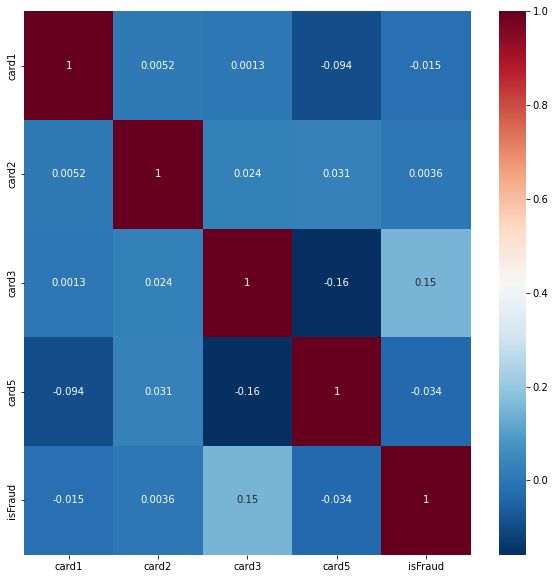

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(train[cards].corr(),annot=True,cmap='RdBu_r')
plt.show()

## Addr
Address:- “both addresses are for purchaser"-addr1 as billing region and addr2 as billing country.

In [22]:
train["addr1"].isnull().sum()

49094

In [23]:
train["addr2"].isnull().sum()

49094

<AxesSubplot:xlabel='addr1', ylabel='Count'>

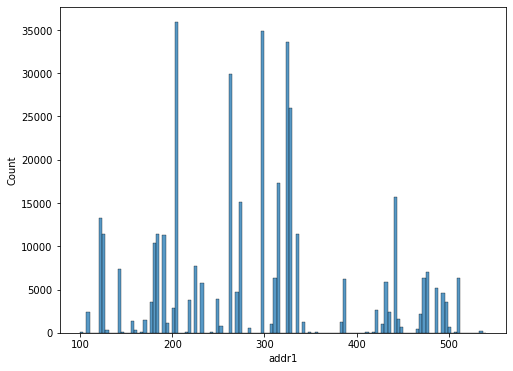

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(train['addr1'])

<AxesSubplot:xlabel='addr2', ylabel='Count'>

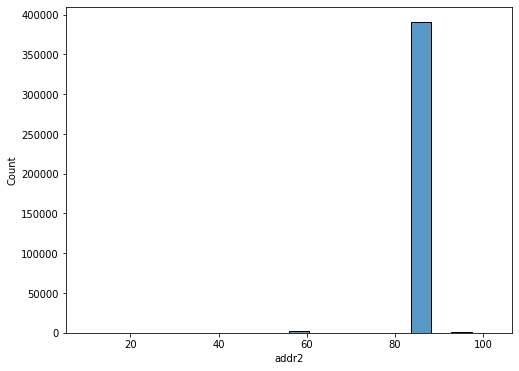

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(train['addr2'])

In [26]:
train["addr2"].value_counts()

87.0     390527
60.0       2347
96.0        476
32.0         64
65.0         62
16.0         37
31.0         35
19.0         30
26.0         19
69.0         13
34.0         13
59.0         13
43.0         12
57.0          9
102.0         9
27.0          9
29.0          8
68.0          7
78.0          7
13.0          5
71.0          5
17.0          5
98.0          5
10.0          5
54.0          5
48.0          4
51.0          4
88.0          4
44.0          3
21.0          3
72.0          3
18.0          3
101.0         3
47.0          3
52.0          3
73.0          3
30.0          3
23.0          2
36.0          2
24.0          2
74.0          2
92.0          2
28.0          2
62.0          2
61.0          2
97.0          2
46.0          2
76.0          2
39.0          2
38.0          2
75.0          1
63.0          1
14.0          1
83.0          1
50.0          1
79.0          1
35.0          1
86.0          1
82.0          1
77.0          1
89.0          1
55.0          1
20.0    

We observe that addr2 is highly concentrated on value 87.
As addr2 has less unique values than addr1 we can saw that addr1 represnts different types of region and addr2 represents country.

## Dist
dist: distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.

In [27]:
train["dist1"].isnull().sum()

264291

In [28]:
train["dist2"].isnull().sum()

414737

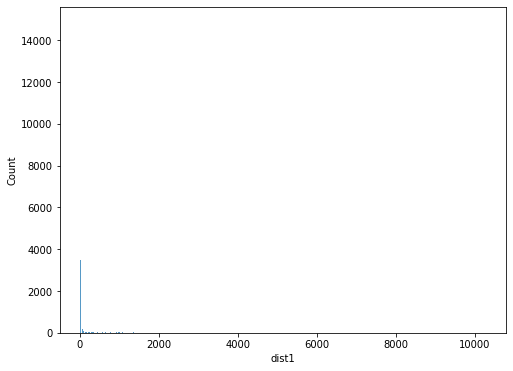

In [29]:
plt.figure(figsize=(8,6))
p = sns.histplot(train["dist1"])

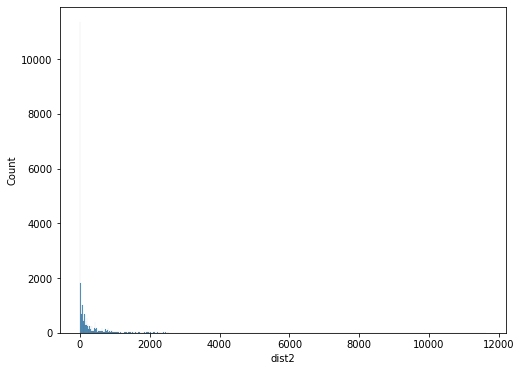

In [30]:
plt.figure(figsize=(8,6))
p = sns.histplot(train["dist2"])

### DeviceType

In [31]:
print(train['DeviceType'].unique())
print()
print(train['DeviceType'].value_counts())

[nan 'desktop' 'mobile']

desktop    63885
mobile     41516
Name: DeviceType, dtype: int64


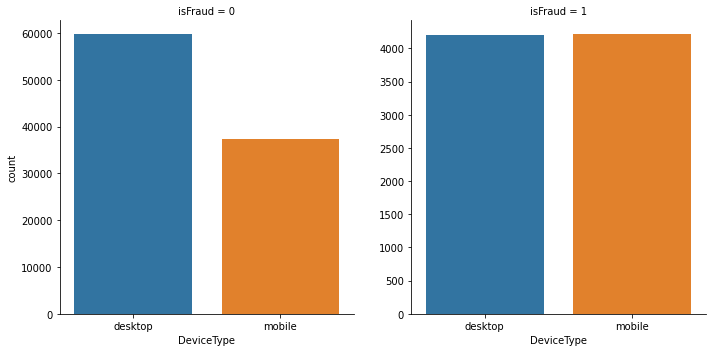

In [32]:
sns.catplot(data = train, x= 'DeviceType', col= 'isFraud', col_wrap=2, kind="count", sharey = False)
plt.show()

The above plot shows that fraud rate in higher in mobile phones.

### DeviceInfo
Group devices based on their fraud rate.

In [34]:
print(train['DeviceInfo'].unique(),  train['DeviceInfo'].unique().size, '\n', test['DeviceInfo'].unique(),  test['DeviceInfo'].unique().size)

[nan 'Windows' 'iOS Device' ... 'SM-G900FD' 'PRA507' 'SM-J500H'] 1658 
 [nan 'SM-G9600 Build/R16NW' 'Windows' ... 'QTAIR7 Build/LMY47D'
 'AX820 Build/MRA58K' 'STV100-3'] 1172


In [35]:
train['DeviceInfo'].fillna('not_given', inplace = True)
test['DeviceInfo'].fillna('not_given', inplace = True)
grouped_devices = train[['DeviceInfo', 'isFraud']].groupby(by = 'DeviceInfo', as_index = False).mean().sort_values(by = 'isFraud', ascending = True)
grouped_devices.head()

,DeviceInfo,isFraud
0,0PAJ5,0.0
1027,SCH-I535,0.0
1026,SCH-I435,0.0
1025,SC-02H,0.0
1024,SAMSUNG-SM-T817A,0.0


In [37]:
trusted_devices = list(grouped_devices[grouped_devices['isFraud'] == 0]['DeviceInfo'])
fraud_devices = list(grouped_devices[grouped_devices['isFraud'] == 1]['DeviceInfo'])
print('Number of devices with 0% and 100% fraud rate respecitvely: ', len(trusted_devices), ',', len(fraud_devices))

for d in trusted_devices:
        train.loc[train['DeviceInfo'] == d, 'DeviceInfo'] = 'trusted'
        test.loc[test['DeviceInfo'] == d, 'DeviceInfo'] = 'trusted'
        
for d in fraud_devices:
        train.loc[train['DeviceInfo'] == d, 'DeviceInfo'] = 'fraudlent'
        test.loc[test['DeviceInfo'] == d, 'DeviceInfo'] = 'fraudlent'
        
        
print('Number of unique devices after grouping in Train : ', train['DeviceInfo'].unique().size)
print('Number of unique devices after grouping in Test : ', test['DeviceInfo'].unique().size)

Number of devices with 0% and 100% fraud rate respecitvely:  1250 , 52
Number of unique devices after grouping in Train :  358
Number of unique devices after grouping in Test :  460


## Analyzing columns with missing values

In [38]:
missing_columns = train.isna().sum()
count_missing_columns = np.count_nonzero(missing_columns.values)
print('Number of columns containing NAN values: ',count_missing_columns)

Number of columns containing NAN values:  413


We obtain the list of columns which do not hold much importance for the following reasons - 

1. A majority of values (>95%) are NULL.
2. Column values are highly skewed/imbalanced (>95% of the values are very close to a particular value)

In [39]:
def drop_columns_with_majority_null_values(df, threshold):
    arr = []
    for i in df.columns:
        if df[i].isnull().sum()/df.shape[0] > threshold:
            arr.append(i)

    return arr


In [40]:
def drop_columns_with_skewed_values(df, threshold):
    arr = []
    for i in df.columns:
        if df[i].dtype!='object':
            if df[i].value_counts(dropna=False, normalize=True).values[0] > threshold:
                arr.append(i)

    return arr

In [41]:
print(drop_columns_with_majority_null_values(train, 0.90))

['dist2', 'D7', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [42]:
print(drop_columns_with_skewed_values(train, 0.95))

['isFraud', 'C3', 'V104', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V125', 'V135', 'V281', 'V286', 'V297', 'V300', 'V301', 'V305', 'V311', 'V319', 'id_07', 'id_08', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26']


In [43]:
train['C3'].value_counts()

0.0     441093
1.0       1597
2.0        125
3.0         45
16.0         6
4.0          5
9.0          5
11.0         4
5.0          3
8.0          2
10.0         2
12.0         2
17.0         2
15.0         2
14.0         2
20.0         1
19.0         1
23.0         1
6.0          1
25.0         1
13.0         1
24.0         1
7.0          1
26.0         1
22.0         1
Name: C3, dtype: int64

## Cardinality Redunction

If many categories have very similar target distribution, merge them into a single category.

In [44]:
def plot_domain_vs_fraud(column_name, grouped_data):
    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(grouped_data[column_name], grouped_data['isFraud'])
    plt.setp(ax.get_xticklabels(), rotation = 40, ha='right')
    plt.show()


In [45]:
def group_values(column_name):
    train[column_name].fillna('not_given', inplace = True)
    test[column_name].fillna('not_given', inplace = True)
    grouped_data = train[[column_name, 'isFraud']].groupby(by = column_name, as_index = False).mean().sort_values(by = 'isFraud', ascending = True)
    print(grouped_data)
    plot_domain_vs_fraud(column_name, grouped_data)
    
    trusted_domains = list(grouped_data[grouped_data['isFraud'] == 0][column_name])
    print('We can see that {} domains in {} have 0 frauds and can be grouped together as a single domain.\nBelow histogram shows the processed column'.format(len(trusted_domains), column_name))
    for d in trusted_domains:
        train.loc[train[column_name] == d, column_name] = 'trusted.com'
        test.loc[test[column_name] == d, column_name] = 'trusted.com'
    grouped_data = train[[column_name, 'isFraud']].groupby(by = column_name, as_index = False).mean().sort_values(by = 'isFraud', ascending = True)
    plot_domain_vs_fraud(column_name, grouped_data)
    

### P_emaildomain

       P_emaildomain   isFraud
27           live.fr  0.000000
22        hotmail.fr  0.000000
20        hotmail.de  0.000000
56          yahoo.de  0.000000
18     hotmail.co.uk  0.000000
17            gmx.de  0.000000
40           ptd.net  0.000000
41             q.com  0.000000
33       netzero.net  0.000000
46  servicios-ta.com  0.000000
32       netzero.com  0.000000
48           twc.com  0.000000
7         cfl.rr.com  0.000000
6    centurylink.net  0.000000
50            web.de  0.000000
51    windstream.net  0.000000
52       yahoo.co.jp  0.000000
53       yahoo.co.uk  0.000000
43    rocketmail.com  0.002123
44     sbcglobal.net  0.003660
38    prodigy.net.mx  0.006289
49       verizon.net  0.007448
47    suddenlink.net  0.007874
45         sc.rr.com  0.007874
3            att.net  0.008541
55      yahoo.com.mx  0.010372
42    roadrunner.com  0.012605
30            me.com  0.014159
5       cableone.net  0.017241
11     earthlink.net  0.017995
57          yahoo.es  0.019231
59      

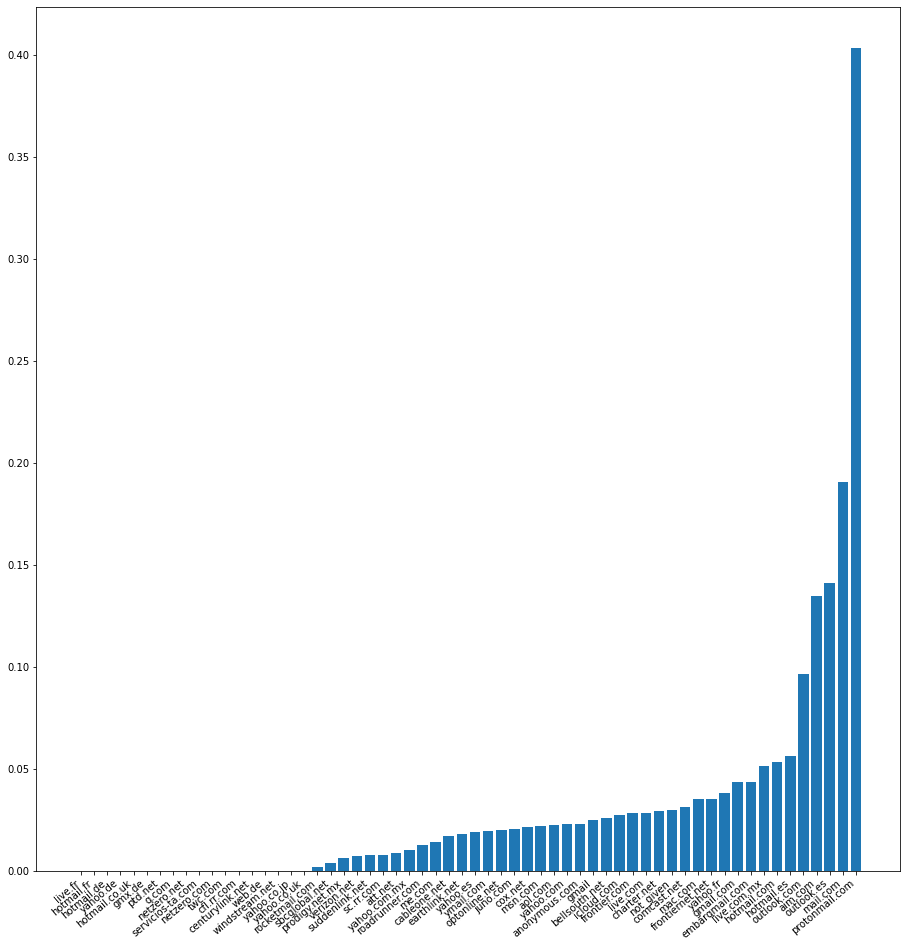

We can see that 18 domains in P_emaildomain have 0 frauds and can be grouped together as a single domain.
Below histogram shows the processed column


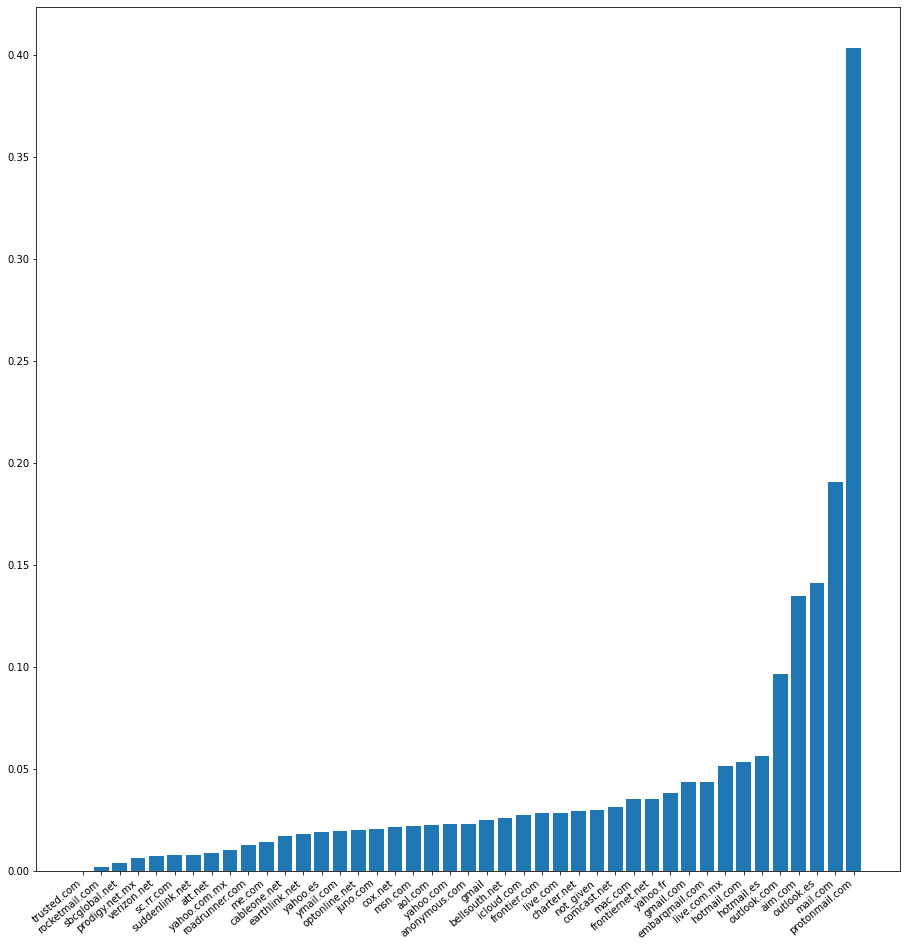

In [46]:
group_values('P_emaildomain')

### R_emaildomain

       R_emaildomain   isFraud
0            aim.com  0.000000
51            web.de  0.000000
20        hotmail.de  0.000000
50       verizon.net  0.000000
22        hotmail.fr  0.000000
49           twc.com  0.000000
24          juno.com  0.000000
40           ptd.net  0.000000
47  servicios-ta.com  0.000000
27           live.fr  0.000000
45         sc.rr.com  0.000000
44     sbcglobal.net  0.000000
32       netzero.com  0.000000
42    roadrunner.com  0.000000
41             q.com  0.000000
46      scranton.edu  0.000000
17            gmx.de  0.000000
18     hotmail.co.uk  0.000000
15             gmail  0.000000
57          yahoo.de  0.000000
3            att.net  0.000000
5       cableone.net  0.000000
52    windstream.net  0.000000
7         cfl.rr.com  0.000000
54       yahoo.co.uk  0.000000
6    centurylink.net  0.000000
53       yahoo.co.jp  0.000000
12    embarqmail.com  0.000000
13      frontier.com  0.000000
14   frontiernet.net  0.000000
31           msn.com  0.001567
4      b

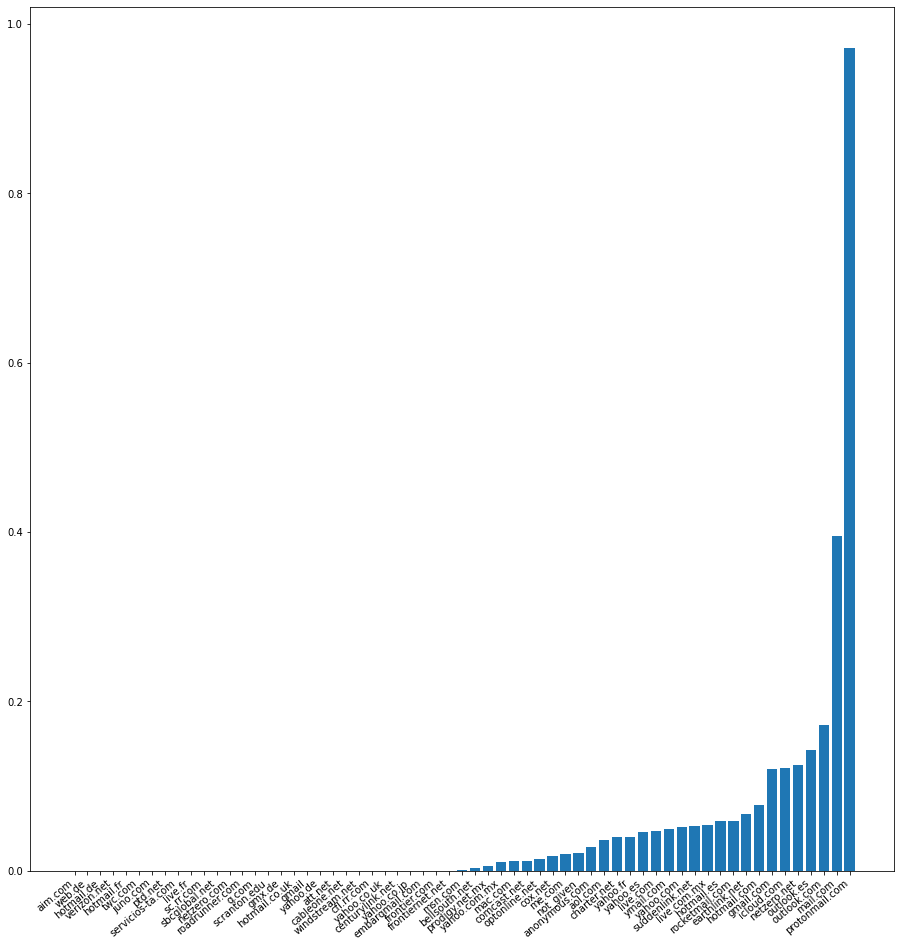

We can see that 30 domains in R_emaildomain have 0 frauds and can be grouped together as a single domain.
Below histogram shows the processed column


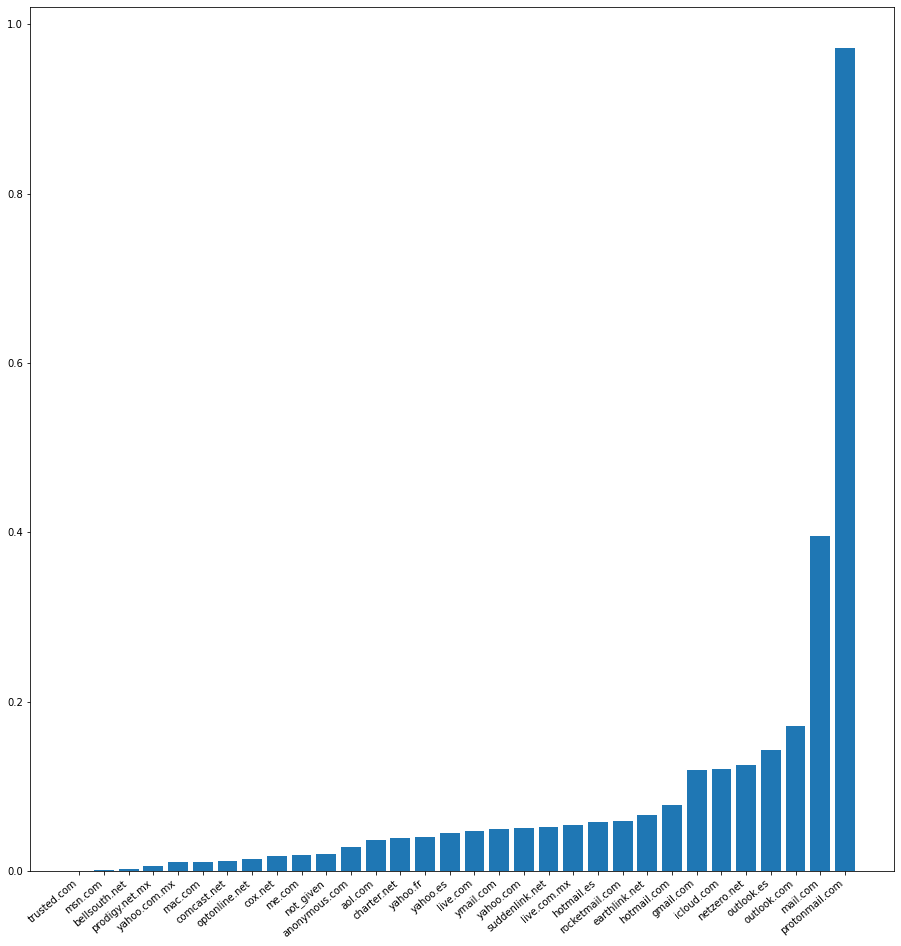

In [47]:
group_values('R_emaildomain')

## Grouping V columns based on number of missing values

In [48]:
null_dict = {}
siV = train.columns.get_loc('V1')
for col in train.columns[siV : siV + 339]:
    nan_count = train[col].isnull().sum()
    if (nan_count > 0):
        try:
            null_dict[nan_count].append(col)
        except:
            null_dict[nan_count] = [col]
            
for key in sorted(null_dict.keys()):
    print('*****' * 18)
    print('NULL COUNT : {}'.format(key))
    print(null_dict[key])

******************************************************************************************
NULL COUNT : 5
['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']
******************************************************************************************
NULL COUNT : 246
['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']
******************************************************************************************
NULL COUNT : 935
['V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 

Within each group, we further divide the features based on their correlation and keep a single column from each subgroup.

In [49]:
def identify_correlated(cols, threshold):
    df = train[cols]
    matrix = df.corr().abs()
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    reduced_matrix = matrix.mask(mask)
    to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > threshold)]
    
    return list(set(to_drop))

In [50]:
vcols_to_drop = []
for value in sorted(null_dict.values()):
    vcols_to_drop.extend(identify_correlated(value, 0.8))

len(vcols_to_drop)

206

### D Columns

<AxesSubplot:>

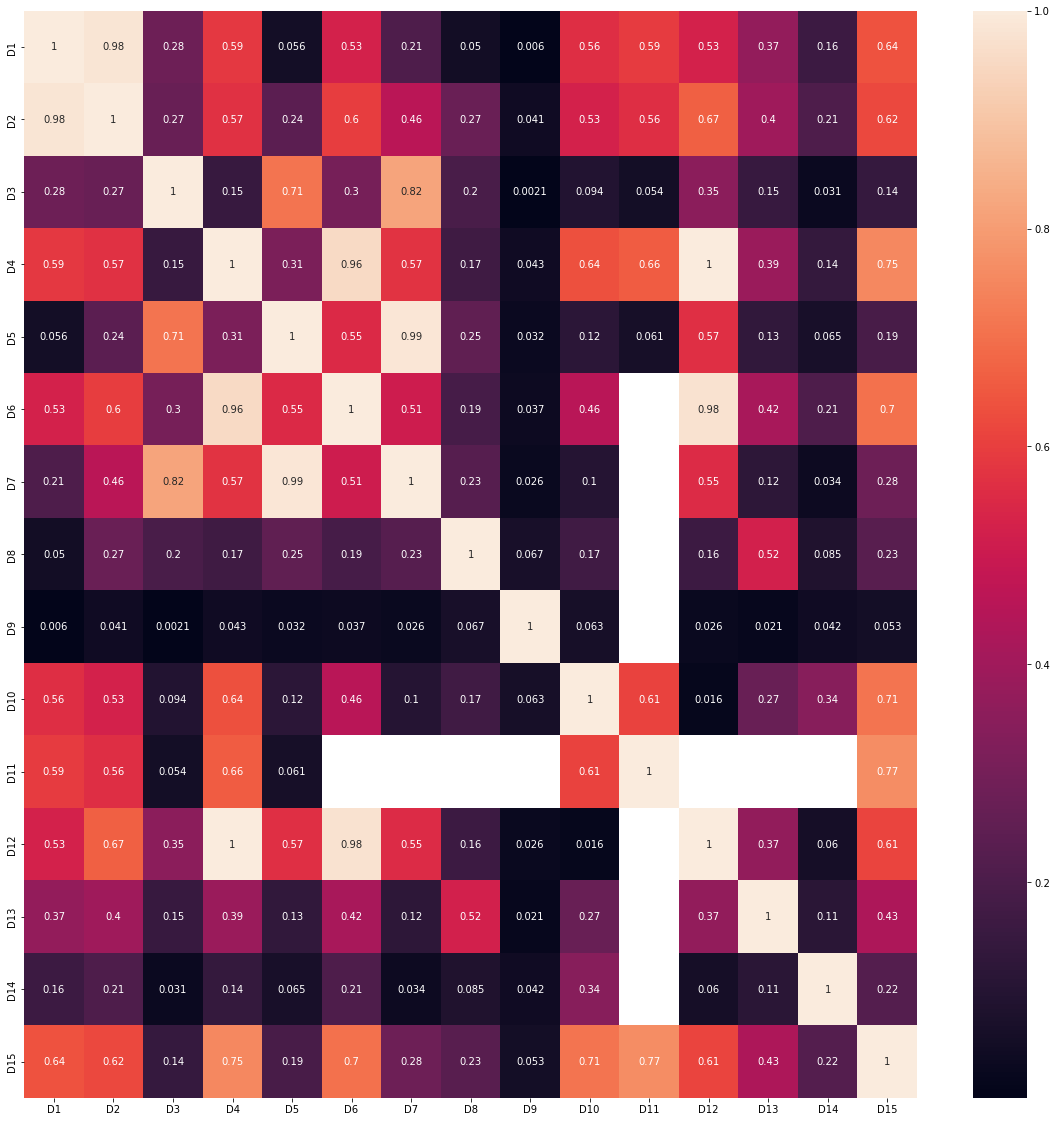

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
siD = train.columns.get_loc('D1')
sns.heatmap(train[train.columns[siD : siD + 15]].corr(),annot=True)

#### Columns with high correlation:-
1) D1 and D2\
2) D3, D5 and D7\
3) D4, D6 and D12


In [52]:
dcols_to_drop = ['D2', 'D5', 'D7', 'D6', 'D12']

### C Columns

<AxesSubplot:>

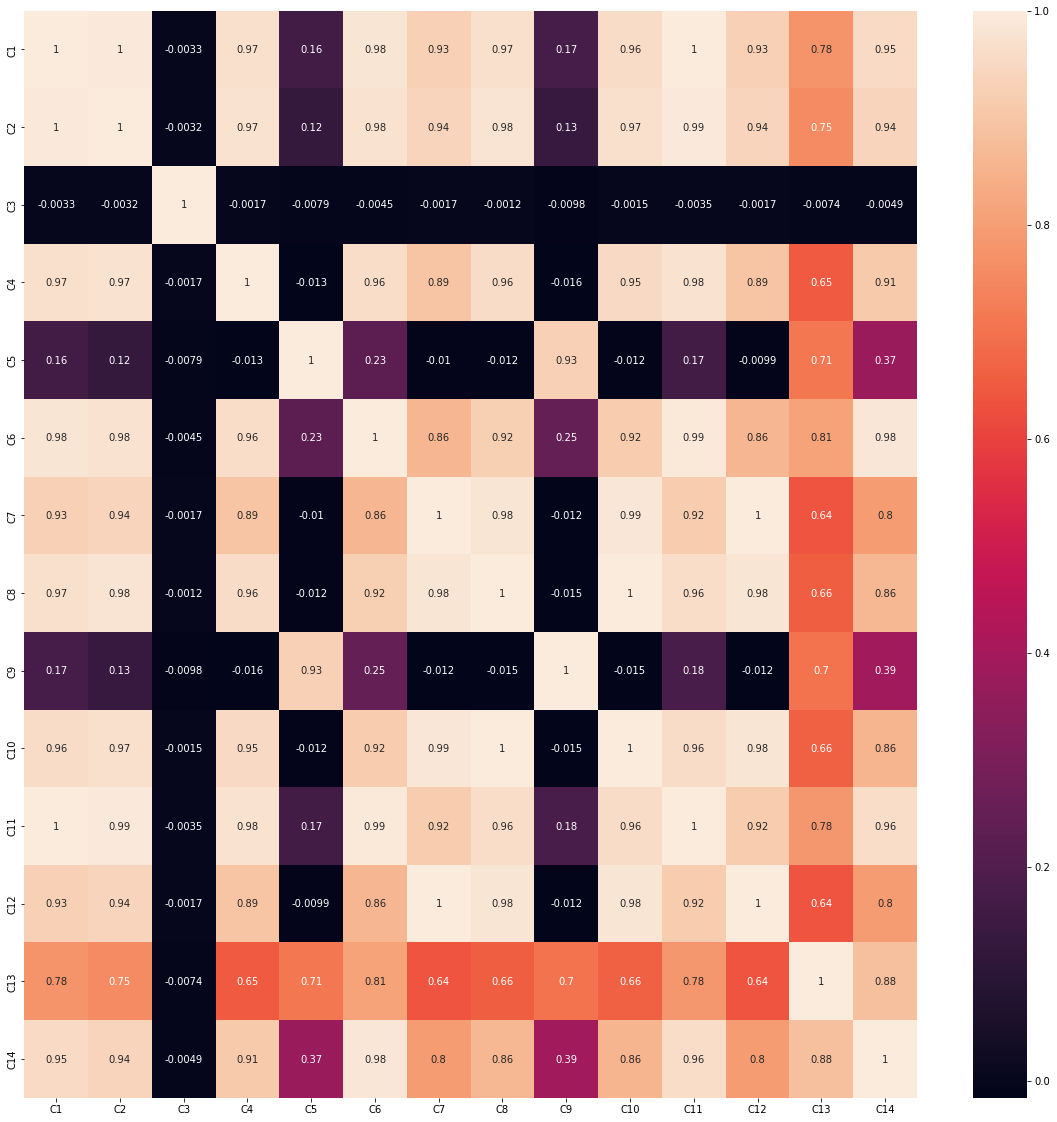

In [53]:
plt.figure(figsize=(20,20))
siC = train.columns.get_loc('C1')
sns.heatmap(train[train.columns[siC : siC + 14]].corr(),annot=True)

#### Columns with high correlation:-
1) C1, C12, C11, C10, C8, C7, C6 ,C4, C2\
2) C3 is independent\
3) C14 and C13\
4) C9 and C5

In [54]:
ccols_to_drop = ['C1', 'C12', 'C11', 'C10', 'C8', 'C7', 'C6', 'C4', 'C14', 'C9']

### Dropping Columns

In [55]:
final_columns_to_drop = list(set(vcols_to_drop + dcols_to_drop + ccols_to_drop + drop_columns_with_majority_null_values(train, 0.95) + drop_columns_with_skewed_values(train, 0.95)))
final_columns_to_drop.sort()

In [56]:
final_columns_to_drop.remove('isFraud')
print(final_columns_to_drop, len(final_columns_to_drop))

['C1', 'C10', 'C11', 'C12', 'C14', 'C3', 'C4', 'C6', 'C7', 'C8', 'C9', 'D12', 'D2', 'D5', 'D6', 'D7', 'V10', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V12', 'V120', 'V121', 'V122', 'V123', 'V125', 'V126', 'V127', 'V128', 'V132', 'V133', 'V135', 'V136', 'V139', 'V141', 'V143', 'V144', 'V145', 'V146', 'V148', 'V149', 'V15', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V159', 'V16', 'V161', 'V162', 'V164', 'V167', 'V168', 'V17', 'V170', 'V172', 'V176', 'V177', 'V178', 'V179', 'V18', 'V181', 'V182', 'V183', 'V184', 'V186', 'V187', 'V188', 'V19', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V200', 'V202', 'V203', 'V204', 'V21', 'V211', 'V212', 'V214', 'V215', 'V217', 'V218', 'V219', 'V22', 'V221', 'V222', 'V224', 'V225', 'V227', 'V228', 'V229', 'V23', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V238', 'V242', 'V243', 'V244', 'V245', 'V246', 'V24

In [57]:
train.drop(final_columns_to_drop, inplace = True, axis = 1)
test.drop(final_columns_to_drop, inplace = True, axis = 1)

In [58]:
train.drop(['TransactionID', 'TransactionDT'], axis = 1, inplace = True)
test.drop(['TransactionID', 'TransactionDT'], axis = 1, inplace = True)

In [60]:
train.shape[1], test.shape[1]

(184, 183)

In [62]:
categorical_columns = train.select_dtypes(include=['O', 'category']).columns
numeric_columns = train.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('isFraud')
len(categorical_columns), len(numeric_columns)

(29, 154)

## Encoding Categorical Columns

Below is the list of all the features containing catergorical data and the number of classes/catergories for each of them

In [63]:
label_encoding = []
for c in categorical_columns:
    uniq = train[c].unique().size
    label_encoding.append(c)
    print(c, '->', uniq)

ProductCD -> 5
card4 -> 5
card6 -> 5
P_emaildomain -> 43
R_emaildomain -> 32
M1 -> 3
M2 -> 3
M3 -> 3
M4 -> 4
M5 -> 3
M6 -> 3
M7 -> 3
M8 -> 3
M9 -> 3
id_12 -> 3
id_15 -> 4
id_16 -> 3
id_28 -> 3
id_29 -> 3
id_30 -> 76
id_31 -> 127
id_33 -> 242
id_34 -> 5
id_35 -> 3
id_36 -> 3
id_37 -> 3
id_38 -> 3
DeviceType -> 3
DeviceInfo -> 358


In [64]:
le = LabelEncoder()
train[label_encoding] = train[label_encoding].apply(le.fit_transform)
test[label_encoding] = test[label_encoding].apply(le.fit_transform)

In [65]:
train.shape

(442905, 184)

#### SimpleImputer() function to fill the missing values in numerical columns with median

In [66]:
imputer = SimpleImputer(strategy='median')
train[numeric_columns] = imputer.fit_transform(train[numeric_columns])
test[numeric_columns] = imputer.fit_transform(test[numeric_columns])

#### StandardScalar() to standardize the data values into a standard format. This is same as normalizing the the columns.

In [67]:
sc = StandardScaler()
train[numeric_columns] = sc.fit_transform(train[numeric_columns]) 
test[numeric_columns] = sc.fit_transform(test[numeric_columns])

In [68]:
train.to_csv('train_preprocessed.csv')
test.to_csv('test_preprocessed.csv')